## Outliers impact on machine learning

In [1]:
## Outlier : outlier is poitn in dataset which is totally different or from other datapoins in the dataset

#### which ml models are senstitve to the outliers ??

1.Naive bayes classifier --- Not sensititve to outliers

2.Svm -- Not Senstitve to outliers

3.Linear regression -- Senstitve to outliers

4.Logistic regression --  Senstive to outliers

5.CLassification / Descision tree regressor --- Not Senstitve

6. Ensemble(Rf,XGboost,GB)

7.KNN  --- Not Senstitve

8.K-Means --- Senstitve

10.PCA --- Senstitve

11.Neural Network --- Senstitve

In [3]:

import pandas as pd 


In [4]:
df = pd.read_csv("tested.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df["Age"].isnull().sum()

86

In [7]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

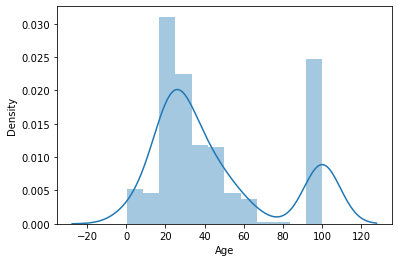

In [11]:
## adding outliers
sns.distplot(df["Age"].fillna(100))

In [ ]:
### Gaussian distribution

Text(0, 0.5, 'No of passangers')

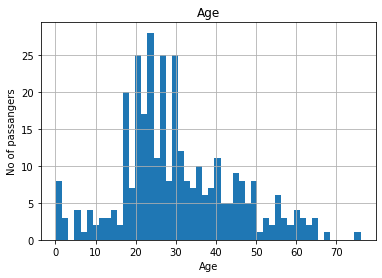

In [16]:
fig = df.Age.hist(bins = 50)
fig.set_title("Age")
fig.set_xlabel("Age")
fig.set_ylabel("No of passangers")

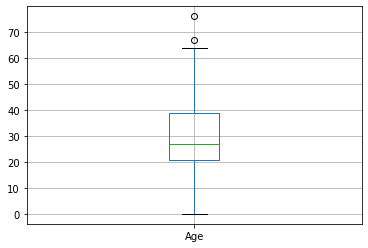

In [17]:
fig = df.boxplot(column = "Age")


In [19]:
df["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [28]:
## ASSUME AGE FOLLOWS A GAUSIAN DISTRIBUTION WE WILL CALCULATE  THE BOUNDARIES WHICH DIFFRENTIATES THE OUTLIERS
upper_boundaries = df["Age"].mean() + 3 *df["Age"].std()

In [29]:
lower_boundaries = df["Age"].mean() - 3 *df["Age"].std()

In [32]:
print(lower_boundaries),print(upper_boundaries),print(df["Age"].mean())

-12.271037345427477
72.81621806831905
30.272590361445783


(None, None, None)

In [31]:
upper_boundaries

72.81621806831905

In [34]:
##Let's compute the interquantile range to calculate the boundaries
IQR = df.Age.quantile(0.75)-df.Age.quantile(0.25)##(DIFF BET 75%-25%)

In [35]:
IQR

18.0

In [37]:
lower_bridge = df["Age"].quantile(0.25) - (IQR*1.5)
upeer_bridge = df["Age"].quantile(0.75) + (IQR*1.5)
print(lower_bridge),print(upeer_bridge)

-6.0
66.0


(None, None)

In [38]:
###Extreme outliers

lower_bridge = df["Age"].quantile(0.25) - (IQR*3)
upeer_bridge = df["Age"].quantile(0.75) + (IQR*3)
print(lower_bridge),print(upeer_bridge)

-33.0
93.0


(None, None)

#### Feature is skewed

Text(0, 0.5, 'No of passangers')

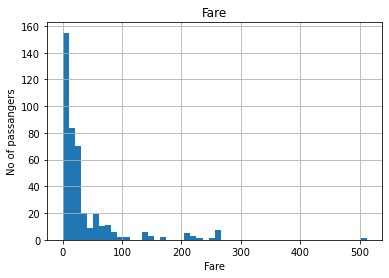

In [39]:
fig = df.Fare.hist(bins = 50)
fig.set_title("Fare")
fig.set_xlabel("Fare")
fig.set_ylabel("No of passangers")

<AxesSubplot:>

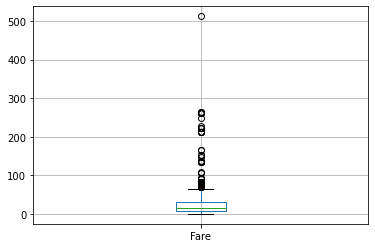

In [41]:
df.boxplot(column = "Fare")

In [42]:
df["Fare"].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [45]:
##Let's compute the interquantile range to calculate the boundaries
IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)##(DIFF BET 75%-25%)

In [46]:
IQR

23.6042

In [47]:
lower_bridge = df["Fare"].quantile(0.25) - (IQR*1.5)
upeer_bridge = df["Fare"].quantile(0.75) + (IQR*1.5)
print(lower_bridge),print(upeer_bridge)

-27.5105
66.9063


(None, None)

In [48]:
lower_bridge = df["Fare"].quantile(0.25) - (IQR*3)
upeer_bridge = df["Fare"].quantile(0.75) + (IQR*3)
print(lower_bridge),print(upeer_bridge)

-62.9168
102.3126


(None, None)

In [52]:
data = df.copy()
data.loc[data["Age"]>=73,"Age" ] = 73

In [54]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,987,0,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,73.0,1,0,19877,78.8500,C46,S
97,989,0,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,990,1,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


In [55]:
data.loc[data["Fare"]>=100,"Fare"]=100

In [58]:
data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Text(0, 0.5, 'No of passangers')

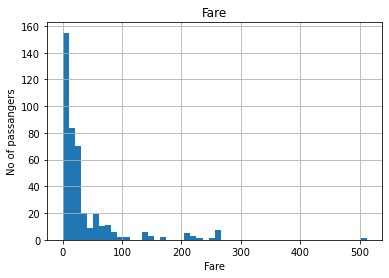

In [59]:
fig = df.Fare.hist(bins = 50)
fig.set_title("Fare")
fig.set_xlabel("Fare")
fig.set_ylabel("No of passangers")